# WeatherPy

## Generate Cities List

In [83]:
# import dependencies
from citipy import citipy as cp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import api_key
import requests
from datetime import date
from scipy.stats import linregress

In [2]:
# initialize list to store cities
cities = []

# set number of samples (cities) to be collected
sample_size = 1500

# randomly generate long & lat values
latitudes = np.random.uniform(low=-90, high=90.00000001, size=(sample_size,))
longitudes = np.random.uniform(low=-180, high=180.00000001, size=(sample_size,))

In [3]:
# generate cities list using citipy
for x in range(sample_size):
    city_name = cp.nearest_city(latitudes[x],longitudes[x]).city_name + ", " + cp.nearest_city(latitudes[x],longitudes[x]).country_code
    
    # only add city name to list if it is unique
    if (city_name not in cities):
        cities.append(city_name)

# print number of cities in the final list
print(len(cities))

628


## Perform API Calls

In [4]:
# save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
url = f"{base_url}appid={api_key}&units={units}&q="

In [18]:
# initialize lists to store response variables
real_lat = []
real_lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
final_city = []
country_code = []
date = []

date_of_execution = date.today().strftime("%m/%d/%y")

print("Beginning Data Retrieval\n-------------------------")

for index, city in enumerate(cities):
    try:
        city_response = requests.get(url + city).json()
        real_lat.append(city_response["coord"]["lat"])
        real_lng.append(city_response["coord"]["lon"])
        temp.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        cloudiness.append(city_response["clouds"]["all"])
        wind_speed.append(city_response["wind"]["speed"])
        date.append(city_response["dt"])
        final_city.append(city.split(",")[0])
        country_code.append(city.split(",")[1])
        print(f"Processing Record {index+1} | {city}")
    except (KeyError):
        print(f"City {index+1} not found. Skipping... | {city}")

Beginning Data Retrieval
-------------------------
Processing Record 1 | busselton, au
Processing Record 2 | punta arenas, cl
Processing Record 3 | mahebourg, mu
Processing Record 4 | mackay, au
Processing Record 5 | homer, us
Processing Record 6 | tasiilaq, gl
Processing Record 7 | lavumisa, sz
Processing Record 8 | qasigiannguit, gl
Processing Record 9 | eureka, us
Processing Record 10 | male, mv
Processing Record 11 | carbonia, it
Processing Record 12 | orocue, co
Processing Record 13 | longyearbyen, sj
City 14 not found. Skipping... | faya, td
Processing Record 15 | naze, jp
Processing Record 16 | ekibastuz, kz
Processing Record 17 | korla, cn
Processing Record 18 | yerbogachen, ru
Processing Record 19 | ugoofaaru, mv
Processing Record 20 | georgetown, sh
Processing Record 21 | gouyave, gd
City 22 not found. Skipping... | illoqqortoormiut, gl
Processing Record 23 | hilo, us
Processing Record 24 | piacabucu, br
Processing Record 25 | bredasdorp, za
Processing Record 26 | vaini, to
P

Processing Record 214 | salinopolis, br
Processing Record 215 | benjamin hill, mx
Processing Record 216 | parabel, ru
Processing Record 217 | bilma, ne
Processing Record 218 | new norfolk, au
Processing Record 219 | kempsey, au
Processing Record 220 | millington, us
Processing Record 221 | hobyo, so
Processing Record 222 | garowe, so
Processing Record 223 | ostrovnoy, ru
Processing Record 224 | cabo san lucas, mx
Processing Record 225 | christchurch, nz
Processing Record 226 | riyadh, sa
Processing Record 227 | cap malheureux, mu
Processing Record 228 | mendi, et
City 229 not found. Skipping... | sovetskiy, tj
Processing Record 230 | san luis, gt
Processing Record 231 | valparaiso, cl
Processing Record 232 | yellowknife, ca
Processing Record 233 | hithadhoo, mv
Processing Record 234 | avarua, ck
Processing Record 235 | lebu, cl
Processing Record 236 | cherskiy, ru
Processing Record 237 | itarema, br
Processing Record 238 | timiryazevskiy, ru
Processing Record 239 | benjamin constant, b

Processing Record 427 | tual, id
Processing Record 428 | camacha, pt
Processing Record 429 | farmington, us
Processing Record 430 | san andres, co
Processing Record 431 | mandalgovi, mn
Processing Record 432 | koutsouras, gr
Processing Record 433 | barcelos, br
Processing Record 434 | shetpe, kz
Processing Record 435 | takoradi, gh
Processing Record 436 | abapo, bo
Processing Record 437 | cabinda, ao
Processing Record 438 | qixingtai, cn
Processing Record 439 | pangnirtung, ca
Processing Record 440 | luderitz, na
Processing Record 441 | san pedro buenavista, mx
Processing Record 442 | vao, nc
Processing Record 443 | lai, td
Processing Record 444 | hurghada, eg
City 445 not found. Skipping... | cagayan de tawi-tawi, ph
Processing Record 446 | klaksvik, fo
Processing Record 447 | sao felix do xingu, br
Processing Record 448 | colwyn bay, gb
Processing Record 449 | concordia, hn
Processing Record 450 | vallenar, cl
Processing Record 451 | yulara, au
Processing Record 452 | pacific grove, 

## Convert Raw Data to DataFrame

In [52]:
# create dataframe with data generated from API calls
weather_df = pd.DataFrame({"City": final_city, 
                           "Lat": real_lat, 
                           "Lng": real_lng, 
                           "Max Temp": temp, 
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country_code,
                           "Date": date
                          })

# output dataframe to csv file
weather_df.to_csv("Output/weather_output.csv", index=False, header=True)

In [53]:
# display dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,51.04,80,93,8.55,au,1626875931
1,punta arenas,-53.1500,-70.9167,35.71,93,75,3.44,cl,1626875914
2,mahebourg,-20.4081,57.7000,70.09,83,75,18.41,mu,1626875954
3,mackay,-21.1500,149.2000,60.04,87,0,5.75,au,1626875954
4,homer,59.6425,-151.5483,55.08,90,100,1.99,us,1626875955
...,...,...,...,...,...,...,...,...,...
557,izhma,65.0083,53.9113,63.70,62,88,11.21,ru,1626876868
558,rawah,34.4816,41.9093,107.33,12,0,16.40,iq,1626876869
559,jawhar,2.7809,45.5005,82.92,59,61,23.47,so,1626876869
560,astoria,46.1879,-123.8313,57.85,94,1,3.44,us,1626876870


## Inspect the data and remove the cities where the humidity > 100%.

In [30]:
# inspect the basic statistical values of the dataframe, paying attention to make sure no max humidity over 100
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,18.583831,17.570557,71.419644,68.151246,56.813167,8.514502,1.626877e+09
std,33.648929,90.827241,15.184784,22.921479,39.204509,6.664924,2.310439e+02
min,-54.800000,-175.200000,28.060000,5.000000,0.000000,0.000000,1.626876e+09
25%,-8.240850,-62.978575,60.690000,56.000000,15.000000,3.565000,1.626876e+09
50%,20.683350,19.962850,73.945000,74.000000,70.000000,6.590000,1.626877e+09
75%,49.122125,101.099975,81.100000,86.000000,97.000000,11.482500,1.626877e+09
max,78.218600,178.416700,119.410000,100.000000,100.000000,51.290000,1.626877e+09


In [49]:
# get the indices of cities that have humidity over 100%
bad_data = []

if weather_df["Humidity"].max() > 100:
    bad_data = weather_df.loc[weather_df["Humidity"]>100, :].index.values
    print(bad_data)

In [50]:
# create new dataframe while dropping humidity outliers by index value
clean_weather_df = weather_df.drop(bad_data, inplace=False)
clean_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,18.583831,17.570557,71.419644,68.151246,56.813167,8.514502,1.626877e+09
std,33.648929,90.827241,15.184784,22.921479,39.204509,6.664924,2.310439e+02
min,-54.800000,-175.200000,28.060000,5.000000,0.000000,0.000000,1.626876e+09
25%,-8.240850,-62.978575,60.690000,56.000000,15.000000,3.565000,1.626876e+09
50%,20.683350,19.962850,73.945000,74.000000,70.000000,6.590000,1.626877e+09
75%,49.122125,101.099975,81.100000,86.000000,97.000000,11.482500,1.626877e+09
max,78.218600,178.416700,119.410000,100.000000,100.000000,51.290000,1.626877e+09


## Plotting the Data

### Latitude vs. Temperature Plot

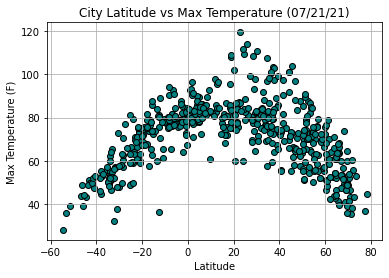

In [79]:
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Max Temp"],color="teal", edgecolors="black")
plt.title("City Latitude vs Max Temperature (" + date_of_execution + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Output/Lat_v_Temp.png")
plt.show()

### Latitude vs. Humidity Plot

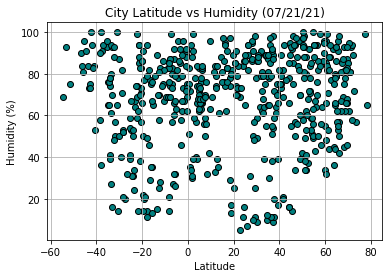

In [80]:
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Humidity"],color="teal", edgecolors="black")
plt.title("City Latitude vs Humidity (" + date_of_execution + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Output/Lat_v_Humid.png")
plt.show()

### Latitude vs. Cloudiness Plot

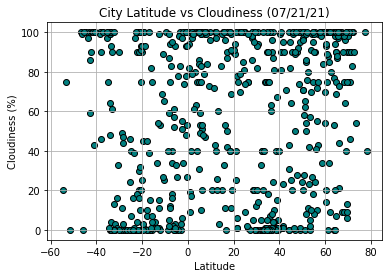

In [81]:
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Cloudiness"],color="teal", edgecolors="black")
plt.title("City Latitude vs Cloudiness (" + date_of_execution + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Output/Lat_v_Cloud.png")
plt.show()

### Latitude vs. Wind Speed Plot

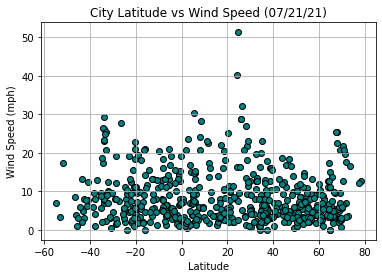

In [82]:
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Wind Speed"],color="teal", edgecolors="black")
plt.title("City Latitude vs Wind Speed (" + date_of_execution + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Output/Lat_v_Wind.png")
plt.show()

## Linear Regression

In [84]:
northern_hem = clean_weather_df.loc[clean_weather_df["Lat"]>=0,:]
southern_hem = clean_weather_df.loc[clean_weather_df["Lat"]<0,:]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.66


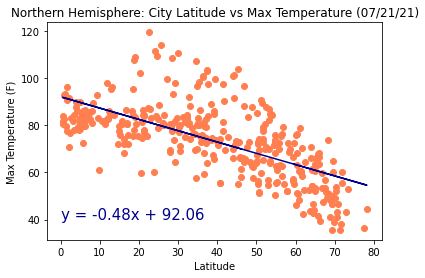

In [107]:
x_axis = northern_hem["Lat"]
y_axis = northern_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (0,40), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Northern Hemisphere: City Latitude vs Max Temperature (" + date_of_execution + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Temp_North.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.83


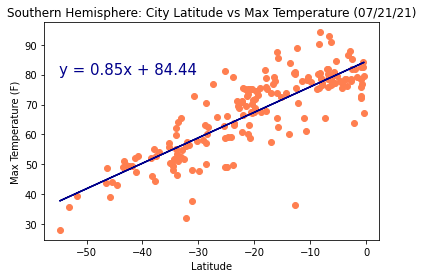

In [108]:
x_axis = southern_hem["Lat"]
y_axis = southern_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (-55,80), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Southern Hemisphere: City Latitude vs Max Temperature (" + date_of_execution + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Temp_South.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1


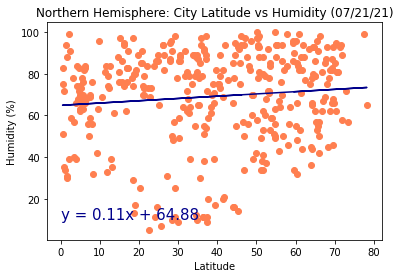

In [109]:
x_axis = northern_hem["Lat"]
y_axis = northern_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (0,10), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Northern Hemisphere: City Latitude vs Humidity (" + date_of_execution + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Humid_North.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03


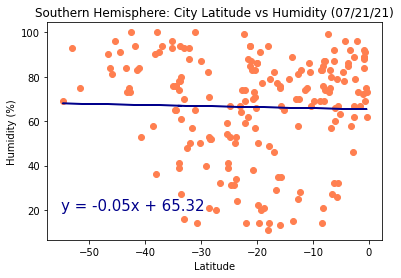

In [111]:
x_axis = southern_hem["Lat"]
y_axis = southern_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (-55,20), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Southern Hemisphere: City Latitude vs Humidity (" + date_of_execution + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Humid_South.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02


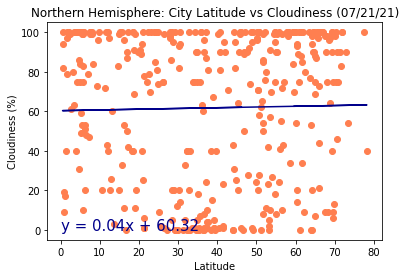

In [113]:
x_axis = northern_hem["Lat"]
y_axis = northern_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (0,0), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Northern Hemisphere: City Latitude vs Cloudiness (" + date_of_execution + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Cloud_North.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.09


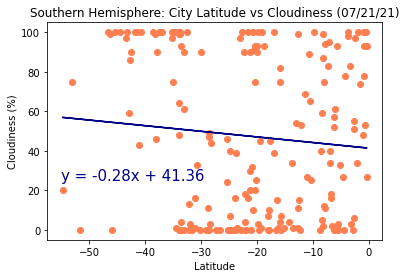

In [115]:
x_axis = southern_hem["Lat"]
y_axis = southern_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (-55,25), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Southern Hemisphere: City Latitude vs Cloudiness (" + date_of_execution + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Cloud_South.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09


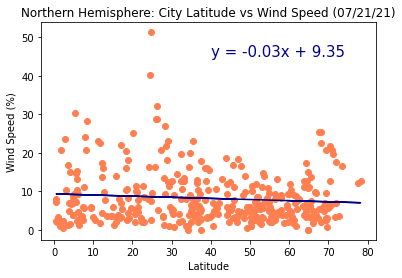

In [120]:
x_axis = northern_hem["Lat"]
y_axis = northern_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (40,45), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Northern Hemisphere: City Latitude vs Wind Speed (" + date_of_execution + ")")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Wind_North.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.02


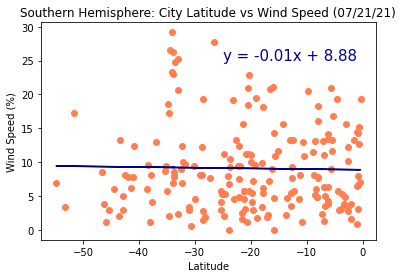

In [123]:
x_axis = southern_hem["Lat"]
y_axis = southern_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, color="darkblue")
plt.annotate(line_eq, (-25,25), color="darkblue", size=15)

plt.scatter(x_axis, y_axis, color="coral")
plt.title("Southern Hemisphere: City Latitude vs Wind Speed (" + date_of_execution + ")")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.savefig("Output/Lat_v_Wind_South.png")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()